In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'

In [2]:
data01 = pd.read_csv('data/LPOINT_BIG_COMP_01_DEMO.csv')
data02 = pd.read_csv('data/LPOINT_BIG_COMP_02_PDDE.csv')
data03 = pd.read_csv('data/LPOINT_BIG_COMP_03_COP_U.csv')
data04 = pd.read_csv('data/LPOINT_BIG_COMP_04_PD_CLAC.csv')
data05 = pd.read_csv('data/LPOINT_BIG_COMP_05_BR.csv')
data06 = pd.read_csv('data/LPOINT_BIG_COMP_06_LPAY.csv')

data01.columns = ['고객번호', '성별', '연령대', '거주지대분류코드']
data02.columns = ['고객번호', '영수증번호', '채널구분', '제휴사', '점포코드', '상품코드', '구매일자', '구매시간', '구매금액', '구매수량']
data03.columns = ['고객번호', '영수증번호', '제휴사', '점포코드', '채널구분', '이용일자', '방문일자', '이용시간', '이용금액']
data04.columns = ['상품코드', '소분류명', '대분류명', '중분류명']
data05.columns = ['점포코드', '제휴사', '점포대분류코드', '점포중분류코드']
data06.columns = ['고객번호', '영수증번호', '제휴사', '채널구분', '이용일자', '이용시간', '이용금액']

# data01 : Demo

In [3]:
data01.head()

,고객번호,성별,연령대,거주지대분류코드
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17


In [4]:
data01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29913 entries, 0 to 29912
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   고객번호      29913 non-null  object
 1   성별        29913 non-null  object
 2   연령대       29913 non-null  object
 3   거주지대분류코드  29913 non-null  object
dtypes: object(4)
memory usage: 934.9+ KB


In [5]:
data01.isnull().sum()

고객번호        0
성별          0
연령대         0
거주지대분류코드    0
dtype: int64

In [6]:
# 범주형 변수 통계
category_data = data01.loc[:,data01.dtypes == 'object']
category_data.describe()

,고객번호,성별,연령대,거주지대분류코드
count,29913,29913,29913,29913
unique,29913,2,6,17
top,M000034966,여성,40대,Z10
freq,1,20083,9863,8157


In [7]:
# 범주형 변수 고객번호 제거
data011 = data01.drop(['고객번호'],axis = 1)
category_data = data011.loc[:,data011.dtypes == 'object']

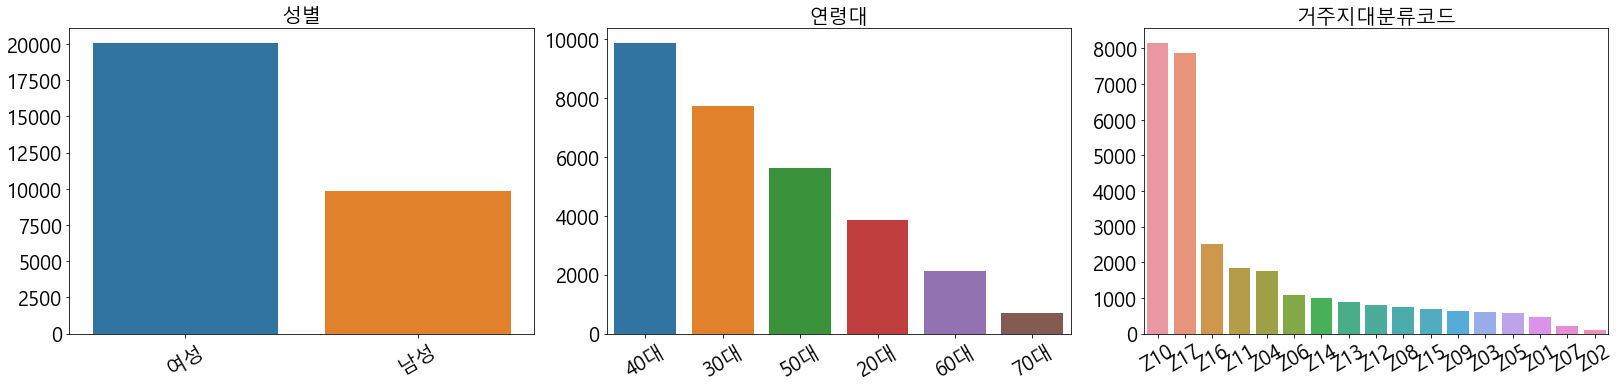

In [8]:
# 범주형 변수 countplot
fig = plt.figure(figsize=(30,30))
area = []
i=0
for col in category_data.columns:
    area.append(fig.add_subplot(6,4,i+1))
    sns.countplot(x=col ,data=category_data, ax=area[i],order=data011[col].value_counts().index)
    plt.title(category_data.columns[i], fontsize = 20)
    plt.xticks(rotation=30,fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    i+=1

# data02 : 상품 구매 정보

In [9]:
data02.head()

,고객번호,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1


In [10]:
data02.isnull().sum()

고객번호          0
영수증번호         0
채널구분          0
제휴사           0
점포코드     428501
상품코드          0
구매일자          0
구매시간          0
구매금액          0
구매수량          0
dtype: int64

In [11]:
# data04, data05 병합
join_data02 = data02.join(data01.set_index('고객번호'), on='고객번호')
join_data02 = join_data02.join(data04.set_index('상품코드'), on='상품코드')
join_data02 = join_data02.join(data05.set_index('점포코드')[['점포중분류코드', '점포대분류코드']], on='점포코드')

# 범주형 변수, 수치형 변수 분리
join_data02_cat = join_data02[['제휴사', '점포코드', '상품코드', '구매일자', '성별', '연령대', '거주지대분류코드', '소분류명', '대분류명', '중분류명', '점포중분류코드', '점포대분류코드', '채널구분']]
join_data02_num = join_data02[['구매금액', '구매수량']]

In [12]:
join_data02.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4381743 entries, 0 to 4381742
Data columns (total 18 columns):
 #   Column    Dtype  
---  ------    -----  
 0   고객번호      object 
 1   영수증번호     object 
 2   채널구분      int64  
 3   제휴사       object 
 4   점포코드      object 
 5   상품코드      object 
 6   구매일자      int64  
 7   구매시간      int64  
 8   구매금액      float64
 9   구매수량      int64  
 10  성별        object 
 11  연령대       object 
 12  거주지대분류코드  object 
 13  소분류명      object 
 14  대분류명      object 
 15  중분류명      object 
 16  점포중분류코드   object 
 17  점포대분류코드   object 
dtypes: float64(1), int64(4), object(13)
memory usage: 601.7+ MB


In [13]:
join_data02.info()

,고객번호,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량,성별,연령대,거주지대분류코드,소분류명,대분류명,중분류명,점포중분류코드,점포대분류코드
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의,Z10042,Z10
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,여성,40대,Z13,기타주방일회용품,주방잡화,주방일회용품,Z13001,Z13
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의,Z10042,Z10
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의,Z10042,Z10
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의,Z10042,Z10


In [ ]:
# 범주형 변수 통계
join_data02_cat.describe()

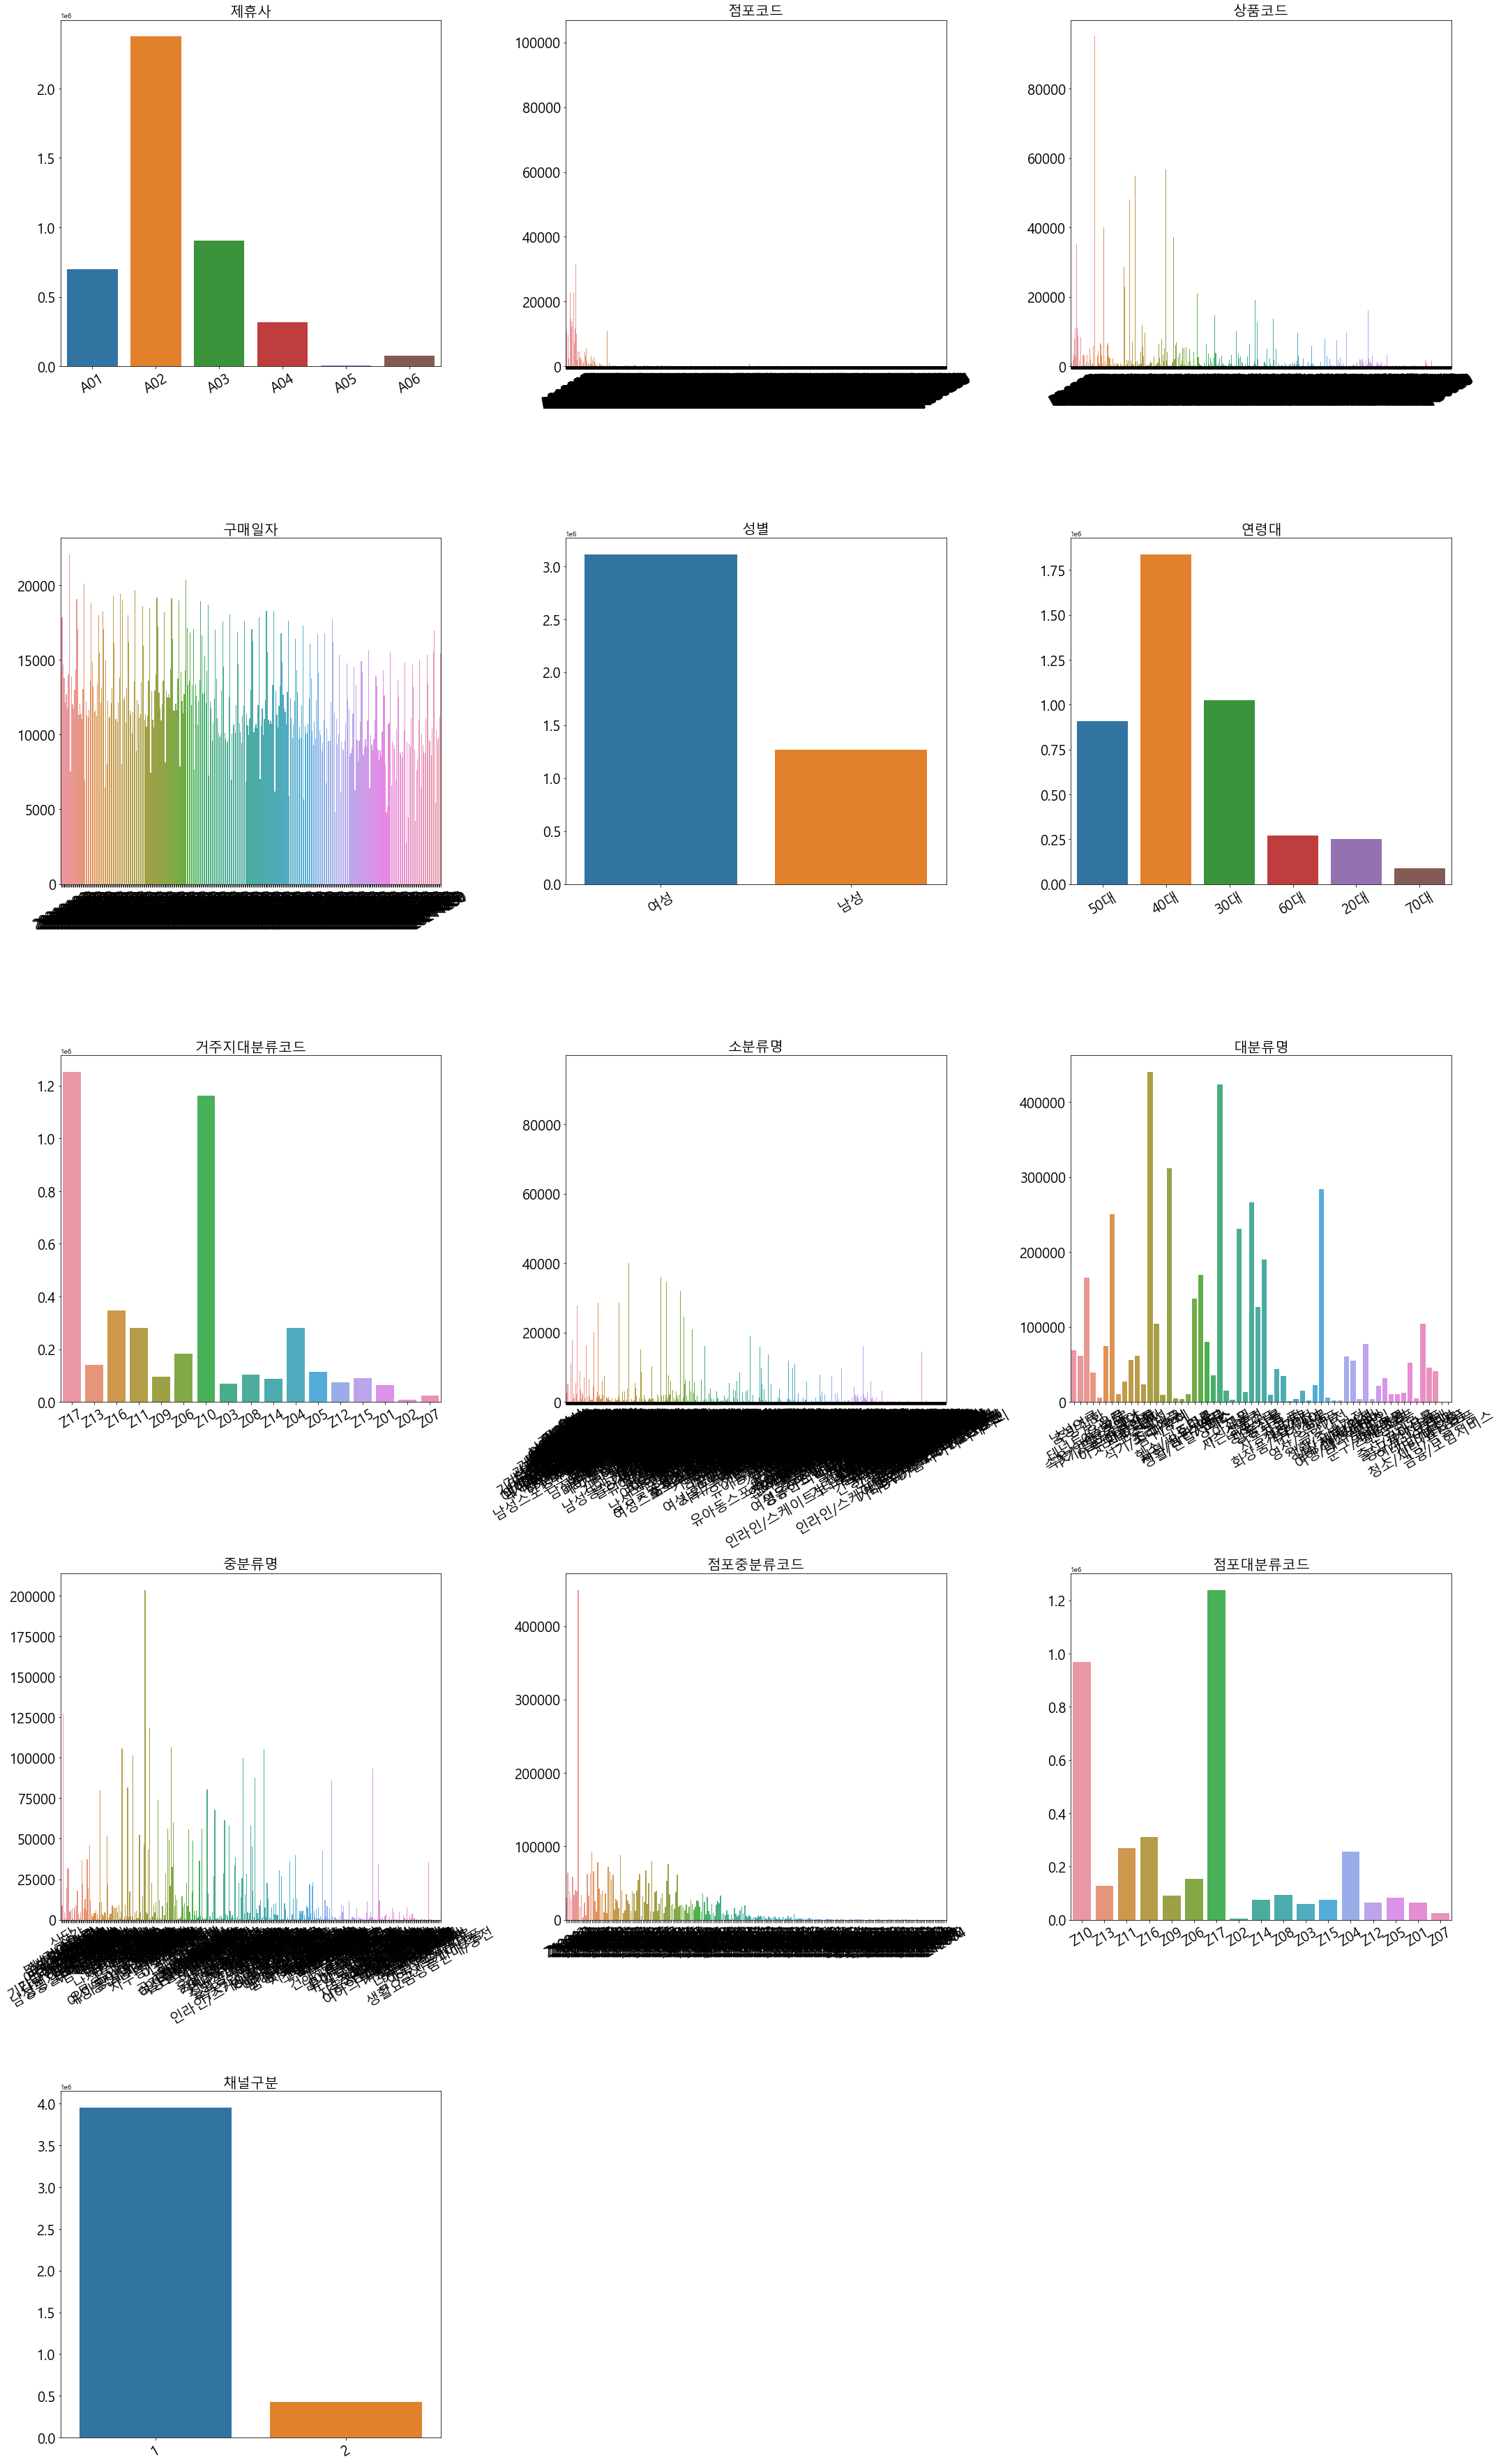

In [14]:
# 범주형 변수 countplot
fig = plt.figure(figsize=(30,90))
area = []
i = 0
for col in join_data02_cat.columns:
    area.append(fig.add_subplot(9,3,i+1))
    sns.countplot(x=col ,data=join_data02_cat, ax=area[i])
    plt.title(col, fontsize = 20)
    plt.xticks(rotation=30,fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    i+=1

In [15]:
data02['구매일자'].value_counts(ascending=True)

20211128     2727
20211207     4246
20211130     4457
20211109     4807
20210921     4855
            ...  
20210227    19436
20210313    19676
20210123    20084
20210501    20307
20210109    22072
Name: 구매일자, Length: 365, dtype: int64

<AxesSubplot:xlabel='구매시간', ylabel='count'>

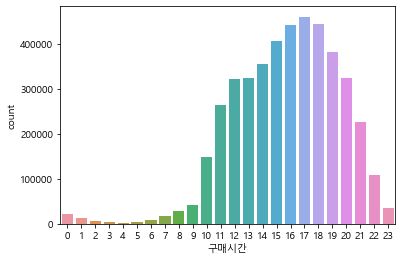

In [16]:
# 구매시간 countplot
sns.countplot(x="구매시간", data=join_data02)

{'whiskers': [<matplotlib.lines.Line2D at 0x21862875f90>,
 'caps': [<matplotlib.lines.Line2D at 0x218628765f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21862875cc0>,
 'medians': [<matplotlib.lines.Line2D at 0x21862876ad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x21862876da0>,
 'means': []}

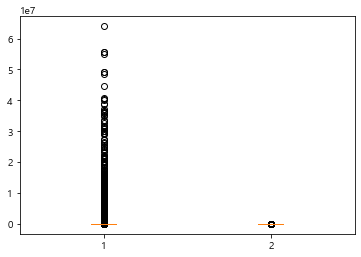

In [17]:
# 수치형 변수 boxplot
plt.boxplot(join_data02_num)

<AxesSubplot:>

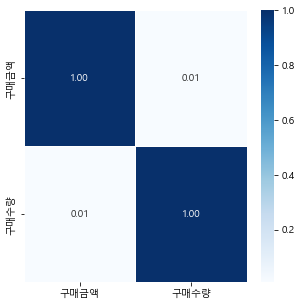

In [18]:
# 수치형 변수 상관관계
plt.figure(figsize=(5,5))
sns.heatmap(data = join_data02_num.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

# data03 : 제휴사 이용 정보

In [19]:
data03.head()

,고객번호,영수증번호,제휴사,점포코드,채널구분,이용일자,방문일자,이용시간,이용금액
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500


In [20]:
data03.isnull().sum()

고객번호      0
영수증번호     0
제휴사       0
점포코드     55
채널구분      0
이용일자      0
방문일자      0
이용시간      0
이용금액      0
dtype: int64

In [21]:
# data05 병합
join_data03 = data03.join(data01.set_index('고객번호'), on='고객번호')
join_data03 = join_data03.join(data05.set_index('점포코드')[['점포중분류코드', '점포대분류코드']], on='점포코드')
join_data03.head()

# 범주형 변수, 수치형 변수 분리
join_data03_cat = join_data03[['제휴사', '점포코드', '채널구분', '이용일자', '방문일자', '성별', '연령대', '거주지대분류코드', '점포중분류코드', '점포대분류코드']]
join_data03_num = join_data03['이용금액']

In [22]:
join_data03.head()

,고객번호,영수증번호,제휴사,점포코드,채널구분,이용일자,방문일자,이용시간,이용금액,성별,연령대,거주지대분류코드,점포중분류코드,점포대분류코드
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000,남성,70대,Z17,Z17024,Z17
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100,남성,70대,Z17,Z17024,Z17
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500,남성,70대,Z17,Z17024,Z17
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200,남성,70대,Z17,Z17024,Z17
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500,남성,70대,Z17,Z17018,Z17


In [23]:
join_data03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248304 entries, 0 to 248303
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   고객번호      248304 non-null  object
 1   영수증번호     248304 non-null  object
 2   제휴사       248304 non-null  object
 3   점포코드      248249 non-null  object
 4   채널구분      248304 non-null  int64 
 5   이용일자      248304 non-null  int64 
 6   방문일자      248304 non-null  int64 
 7   이용시간      248304 non-null  int64 
 8   이용금액      248304 non-null  int64 
 9   성별        248304 non-null  object
 10  연령대       248304 non-null  object
 11  거주지대분류코드  248304 non-null  object
 12  점포중분류코드   248249 non-null  object
 13  점포대분류코드   248249 non-null  object
dtypes: int64(5), object(9)
memory usage: 26.5+ MB


In [ ]:
# 범주형 변수 통계
join_data03_cat.describe()

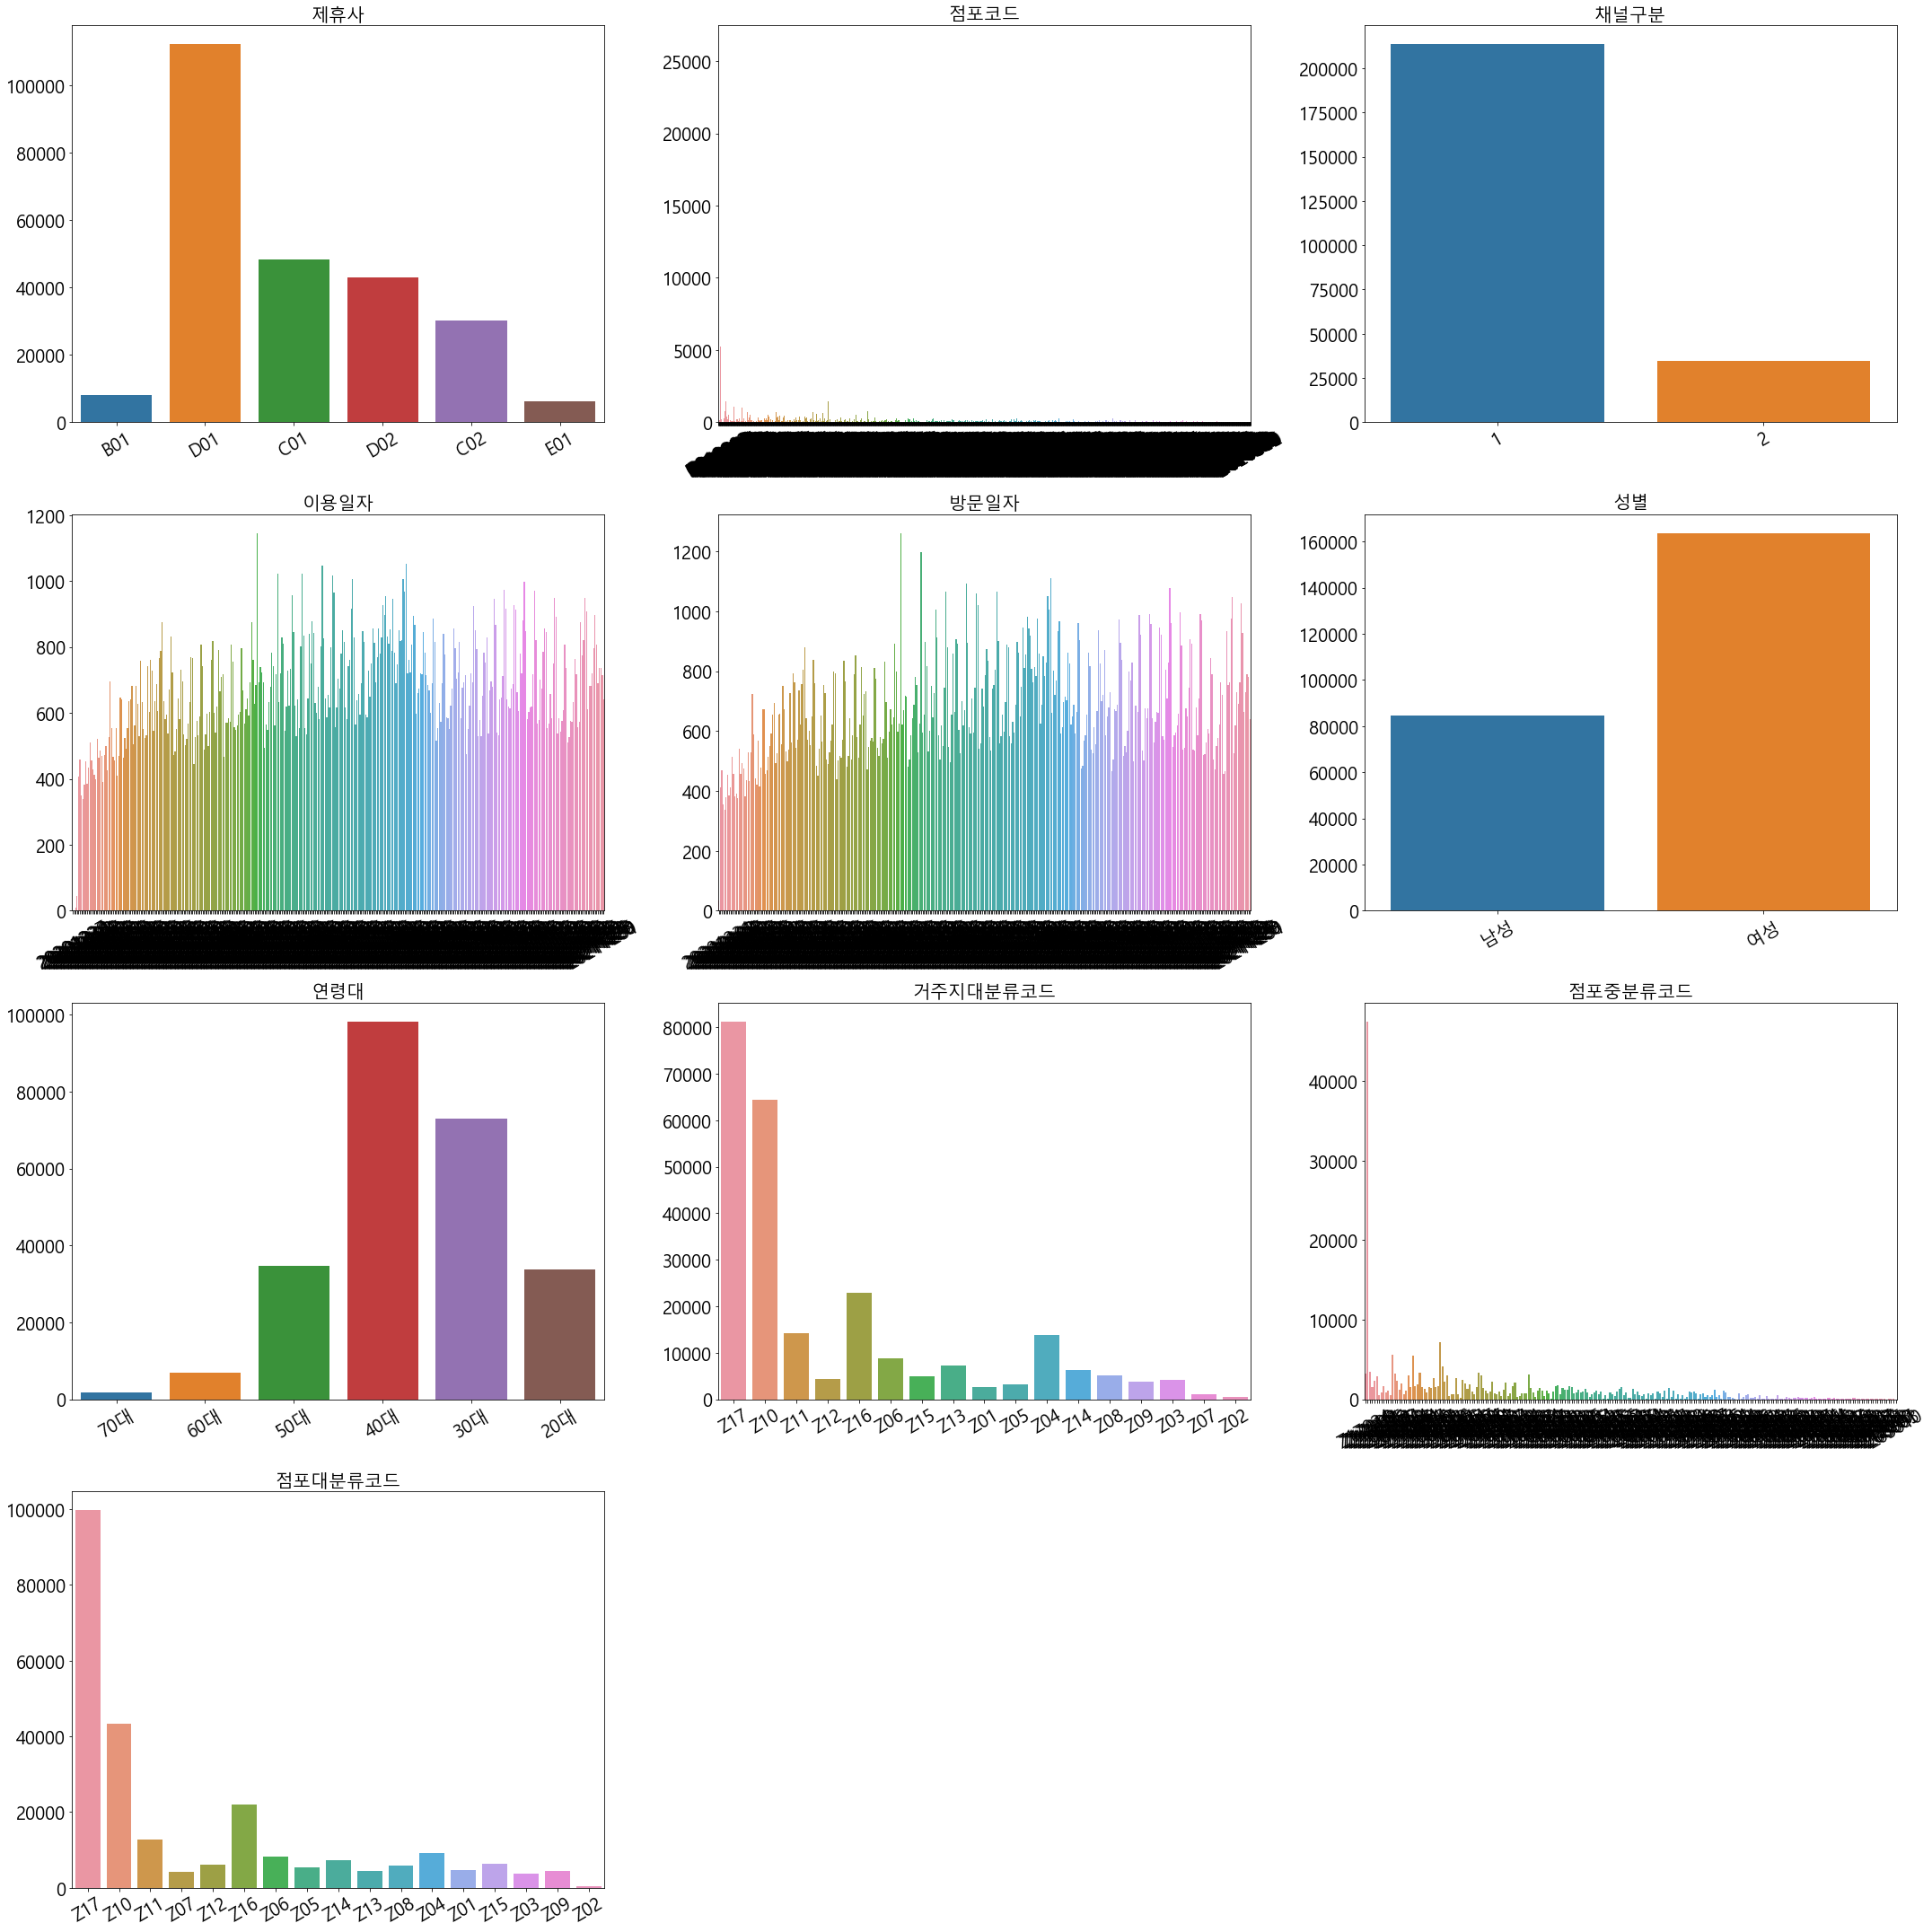

In [24]:
# 범주형 변수 countplot
fig = plt.figure(figsize=(30,30))
area = []
i = 0
for col in join_data03_cat.columns:
    area.append(fig.add_subplot(4,3,i+1))
    sns.countplot(x=col ,data=join_data03_cat, ax=area[i])
    plt.title(col, fontsize = 20)
    plt.xticks(rotation=30,fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    i+=1  

In [25]:
data03['이용일자'].value_counts(ascending=True)

20201227       1
20201229       2
20201230       9
20201231      45
20210104     338
            ... 
20210605    1022
20210519    1023
20210619    1047
20210816    1052
20210505    1146
Name: 이용일자, Length: 369, dtype: int64

<AxesSubplot:xlabel='이용시간', ylabel='count'>

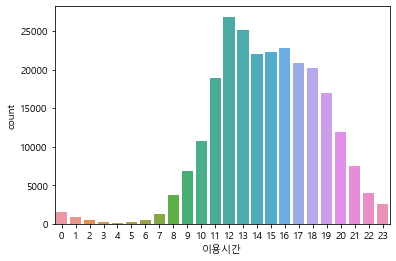

In [26]:
# 이용시간 countplot
sns.countplot(x="이용시간", data=join_data03)

{'whiskers': [<matplotlib.lines.Line2D at 0x21883cefd30>,
 'caps': [<matplotlib.lines.Line2D at 0x218229ecd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x21883ceff40>],
 'medians': [<matplotlib.lines.Line2D at 0x218229ef7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x218229ec550>],
 'means': []}

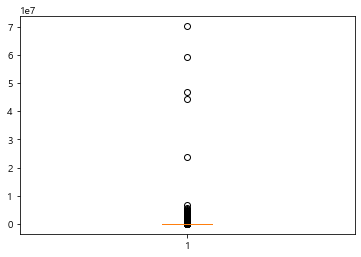

In [27]:
# 수치형 변수 boxplot
plt.boxplot(join_data03_num)

# data06 : 엘페이 이용 정보

In [28]:
data06.head()

,고객번호,영수증번호,제휴사,채널구분,이용일자,이용시간,이용금액
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500


In [29]:
data06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353184 entries, 0 to 353183
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   고객번호    353184 non-null  object
 1   영수증번호   353184 non-null  int64 
 2   제휴사     353184 non-null  object
 3   채널구분    353184 non-null  int64 
 4   이용일자    353184 non-null  int64 
 5   이용시간    353184 non-null  int64 
 6   이용금액    353184 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 18.9+ MB


In [30]:
# 범주형, 수치형 변수 분리
category_data = data06.loc[:,data06.dtypes == 'object']
numerical_data = data06.loc[:,data06.dtypes != 'object']

In [31]:
# 범주형 변수 통계
category_data.describe()

,고객번호,제휴사
count,353184,353184
unique,8906,14
top,M785169881,A06
freq,1334,93869


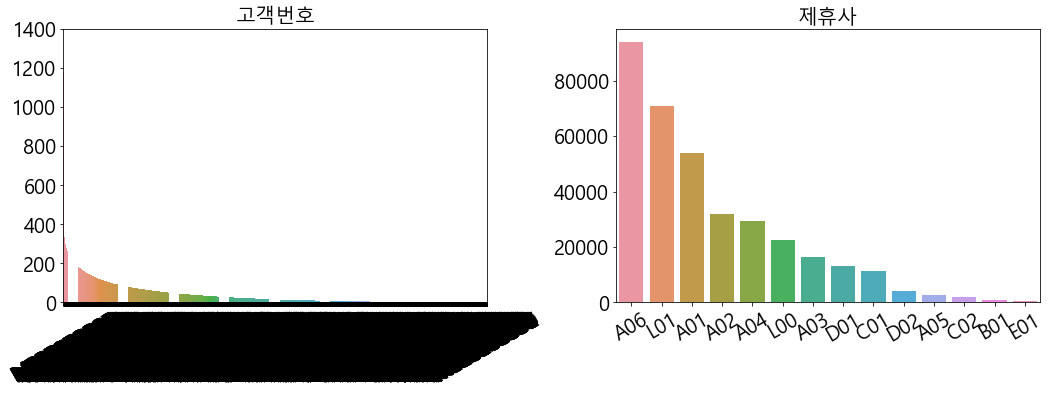

In [32]:
# 범주형 변수 countplot
fig = plt.figure(figsize=(30,30))
area = []
i=0
for col in category_data.columns:
    area.append(fig.add_subplot(6,4,i+1))
    sns.countplot(x=col ,data=category_data, ax=area[i],order=data06[col].value_counts().index)
    plt.title(category_data.columns[i], fontsize = 20)
    plt.xticks(rotation=30,fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    i+=1

In [34]:
# 수치형 변수 통계
numerical_data.describe()

,영수증번호,채널구분,이용일자,이용시간,이용금액
count,3.531840e+05,353184.000000,3.531840e+05,353184.000000,3.531840e+05
mean,2.106709e+14,1.575264,2.021067e+07,14.707931,6.081179e+04
std,3.376498e+11,0.494304,3.376495e+02,5.215817,3.417790e+05
min,2.101010e+14,1.000000,2.021010e+07,0.000000,5.000000e+00
25%,2.104082e+14,1.000000,2.021041e+07,12.000000,7.450000e+03
50%,2.106302e+14,2.000000,2.021063e+07,15.000000,2.000000e+04
75%,2.109301e+14,2.000000,2.021093e+07,19.000000,4.859050e+04
max,2.112312e+14,2.000000,2.021123e+07,23.000000,3.000000e+07


In [35]:
numerical_data.nunique()

영수증번호    353184
채널구분          2
이용일자        365
이용시간         24
이용금액      37755
dtype: int64

In [36]:
data062 = data06.drop(['영수증번호','채널구분','이용일자','이용시간'],axis = 1)
numerical_data = data062.loc[:,data062.dtypes != 'object']

<AxesSubplot:>

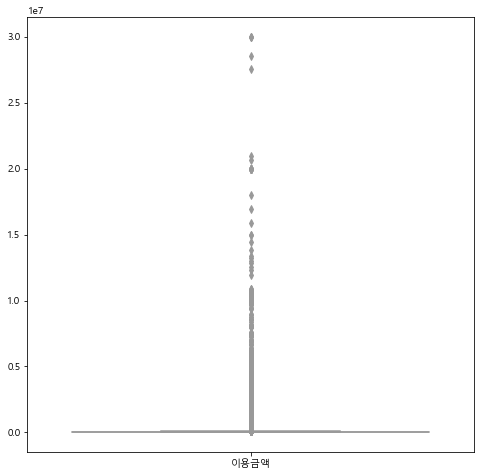

In [38]:
# 수치형 변수 boxplot
plt.figure(figsize=(8,8))
sns.boxplot(data = numerical_data,orient="v",color='white')

In [39]:
# 이용일자, 이용시간 object type으로 변경
data06['이용일자'] = data06['이용일자'].astype(str)
data06['이용시간'] = data06['이용시간'].astype(str)

In [40]:
# 범주형, 수치형 변수 분리
category_data = data06.loc[:,data06.dtypes == 'object']
numerical_data = data06.loc[:,data06.dtypes != 'object']

In [41]:
data06 = data06.drop(['고객번호','제휴사'],axis = 1)

In [43]:
data06['이용일자'].value_counts(ascending=True)

20210921     475
20210212     503
20210920     580
20210211     693
20211010     719
            ... 
20210426    1342
20210505    1345
20210621    1358
20210802    1426
20210607    1506
Name: 이용일자, Length: 365, dtype: int64

<AxesSubplot:xlabel='이용시간', ylabel='count'>

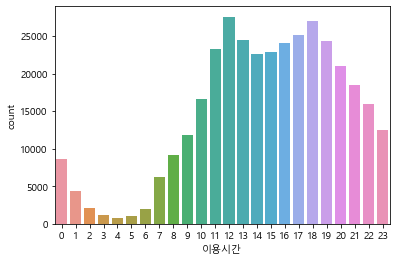

In [44]:
# 이용시간 countplot
sns.countplot(x="이용시간", data = category_data,order = list(map(str, range(24))))